In [5]:
# %load_ext autoreload
# %autoreload 2

# import modish
# import matplotlib.pyplot as plt
# import seaborn as sns
# import numpy as np
# import pandas as pd

# sns.set(style='ticks', context='talk', rc={'font.sans-serif':'Arial', 'pdf.fonttype': 42})

# %matplotlib inline




# import flotilla

# study = flotilla.embark('singlecell_pnm_figure3_modalities_features')

# not_outliers = study.splicing.singles.index.difference(study.splicing.outliers.index)

/home/obotvinnik/anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:784: UserWarning: Found matplotlib configuration in ~/.matplotlib/. To conform with the XDG base directory standard, this configuration location has been deprecated on Linux, and the new location is now /home/obotvinnik/.config/matplotlib/. Please move your configuration there to ensure that matplotlib will continue to find it in the future.
  _get_xdg_config_dir())
/home/obotvinnik/anaconda/lib/python2.7/site-packages/pandas/io/parsers.py:1170: DtypeWarning: Columns (11,18,19,20) have mixed types. Specify dtype option on import or set low_memory=False.
  data = self._reader.read(nrows)


2015-12-02 13:53:41	Reading datapackage from /home/obotvinnik/flotilla_projects/singlecell_pnm_figure3_modalities_features/datapackage.json
2015-12-02 13:53:41	Parsing datapackage to create a Study object
2015-12-02 13:54:30	Initializing Study
2015-12-02 13:54:30	Initializing Predictor configuration manager for Study
2015-12-02 13:54:30	Predictor ExtraTreesClassifier is of type <class 'sklearn.ensemble.forest.ExtraTreesClassifier'>
2015-12-02 13:54:30	Added ExtraTreesClassifier to default predictors
2015-12-02 13:54:30	Predictor ExtraTreesRegressor is of type <class 'sklearn.ensemble.forest.ExtraTreesRegressor'>
2015-12-02 13:54:30	Added ExtraTreesRegressor to default predictors
2015-12-02 13:54:30	Predictor GradientBoostingClassifier is of type <class 'sklearn.ensemble.gradient_boosting.GradientBoostingClassifier'>
2015-12-02 13:54:30	Added GradientBoostingClassifier to default predictors
2015-12-02 13:54:30	Predictor GradientBoostingRegressor is of type <class 'sklearn.ensemble.gradi

In [1]:
import kvector

%load_ext autoreload
%autoreload

/home/obotvinnik/anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:784: UserWarning: Found matplotlib configuration in ~/.matplotlib/. To conform with the XDG base directory standard, this configuration location has been deprecated on Linux, and the new location is now /home/obotvinnik/.config/matplotlib/. Please move your configuration there to ensure that matplotlib will continue to find it in the future.
  _get_xdg_config_dir())


In [2]:
folder = '/home/obotvinnik/Dropbox/figures2/singlecell_pnm/figure2_modalities/motifs'
! mkdir $folder

mkdir: cannot create directory `/home/obotvinnik/Dropbox/figures2/singlecell_pnm/figure2_modalities/motifs': File exists


In [3]:
homer_folder = '/projects/ps-yeolab/obotvinnik/singlecell_pnms/figure2_modalities/homer/'

In [4]:
ls $homer_folder

exon2_MN_bimodal/
exon2_MN_bimodal_downstream200/
exon2_MN_bimodal_downstream400/
exon2_MN_bimodal_downstream400_foreground/
exon2_MN_bimodal_downstream400_placental_foreground/
exon2_MN_bimodal_downstream400_primate_foreground/
exon2_MN_bimodal_foreground/
exon2_MN_bimodal_placental_foreground/
exon2_MN_bimodal_primate_foreground/
exon2_MN_bimodal_upstream200/
exon2_MN_bimodal_upstream400/
exon2_MN_multimodal/
exon2_MN_multimodal_downstream200/
exon2_MN_multimodal_downstream400/
exon2_MN_multimodal_downstream400_foreground/
exon2_MN_multimodal_downstream400_placental_foreground/
exon2_MN_multimodal_downstream400_primate_foreground/
exon2_MN_multimodal_foreground/
exon2_MN_multimodal_placental_foreground/
exon2_MN_multimodal_primate_foreground/
exon2_MN_multimodal_upstream200/
exon2_MN_multimodal_upstream400/
exon2_MN_~0/
exon2_MN_~0_downstream200/
exon2_MN_~0_downstream400/
exon2_MN_~0_downstream400_foreground/
exon2_MN_~0_downstream400_placental_foreground/
exon2_MN_~0_downstream400_

In [ ]:
# %%time

import glob

globber = '/projects/ps-yeolab/obotvinnik/singlecell_pnms/figure2_modalities/homer/*ground/homerMotifs.all.motifs'

celltypes = 'iPSC', 'NPC', 'MN', 'sMN'

metadata_dfs = []
motif_kvector_dfs = []

kmer_lengths = 4, 5, 6

for filename in glob.glob(globber):
    motifs = kvector.read_motifs(filename, residues='ACGU')
    metadata = kvector.create_metadata(motifs)

    prefix = filename.split('/')[-2]
    split = prefix.split('_')
#     print moti
#     motif_kind = prefix.split('exon2')[1]
    if 'stream' not in prefix:
        location = 'exonbody'
    else:
        location = split[-2]
    if not any(map(lambda x: x in prefix, celltypes)):
#         motif_kind = '_allcelltypes' + motif_kind
        celltype = 'allcelltypes'
        modality = split[1]
    else:
        celltype = [x for x in celltypes if x in prefix][0]
        modality = split[2]
    print '\t'.join([celltype, location, modality])
    motif_suffix = '_{}_{}_{}'.format(celltype, location, modality)
    metadata['Motif ID'] += motif_suffix
    metadata['Celltype'] = celltype
    metadata['Location'] = location
    metadata['Modality'] = modality
    metadata_dfs.append(metadata)
    
    
    motif_kvectors = kvector.motifs_to_kmer_vectors(motifs, residues='ACGU', kmer_lengths=kmer_lengths)
    motif_kvector_dfs.append(motif_kvectors)

In [ ]:
motif_metadata = pd.concat(metadata_dfs, ignore_index=True)
motif_metadata.head()

In [ ]:
motif_kvectors = pd.concat(motif_kvector_dfs, axis=1)
motif_kvectors.head()

In [5]:
from Bio import motifs

In [10]:
filename = '/projects/ps-yeolab/obotvinnik/singlecell_pnms/figure2_modalities/homer/exon2_bimodal/homerMotifs.all.motifs'

In [11]:
from Bio import SeqIO

In [12]:
def score_kmers(pwm, kmers):
    """Generator to score kmers given a position-weight matrix
    
    Parameters
    ----------
    pwm : pandas.DataFrame
        A (length, 4) dataframe of the weight of each position's probability 
        of each nucleotide
    kmers : list of list
        A list of kmers strings as lists, e.g. [['G', 'G', 'G', 'G', 'G', 'G']]
    
    """
    motif_length = pwm.shape[0]
    for kmer in kmers:
        k = len(kmer)
        
        divisor = min(k, motif_length)
        if k == motif_length:
            score = np.sum(pwm.lookup(range(motif_length), kmer))/divisor
        elif k > motif_length:
            starts = range(k - motif_length + 1)
            n_positions = len(starts)
            score = sum(np.sum(pwm.lookup(range(motif_length), 
                                                kmer[start:(start+motif_length)]))/divisor
                        for start in starts)/n_positions
        else:
            # k < motif_length
            starts = range(motif_length - k + 1)
            n_positions = len(starts)
            score = sum(np.sum(pwm.lookup(range(start, start+k), kmer))/divisor
                        for start in starts)/n_positions
        yield score

In [13]:
import six
import pandas as pd

RNA = 'ACGU'
DNA = 'ACGT'

def homer_motif_reader(handle, residues=DNA):
    """Read homer.motifs output and return tuples of motif_id, motif_pwm (as pandas dataframe)
    
    
    """
    names = list(residues)
    record_id, record = None, ''
    new_record_id = None
    for line in handle:
        if line.startswith('>'):
            new_record_id = line.lstrip('>').strip()
            if record_id is None:
                record_id = new_record_id
            if len(record) > 0:
#                 print '\n', record
                pwm = pd.read_table(six.StringIO(record), header=None, names=names)
                yield record_id, pwm
                record = ''
                record_id = new_record_id
        else:
            record += line

In [14]:
with open(filename) as f:
    records = pd.Series(dict(homer_motif_reader(f, residues=RNA)))

In [15]:
records.index[0]

'ATAGT\t1-ATAGT\t4.350544\t-9.740063\t0\tT:886.0(41.11%),B:2079.4(37.06%),P:1e-4\tTpos:104.3,Tstd:61.5,Bpos:101.6,Bstd:63.3,StrandBias:10.0,Multiplicity:1.37'

In [16]:
records[0]

,A,C,G,U
0,0.613,0.150,0.236,0.001
1,0.001,0.036,0.006,0.957
2,0.749,0.001,0.001,0.249
3,0.180,0.176,0.643,0.001
4,0.036,0.001,0.157,0.806


In [17]:
import os

In [18]:
motif_kind = filename.split('/')[-2]
motif_kind = motif_kind.split('exon2_')[1]
if 'stream' not in motif_kind:
    motif_kind += '_exonbody'
motif_kind

'bimodal_exonbody'

In [19]:
with open(filename) as f:
    records = pd.Series(dict(homer_motif_reader(f, residues=RNA)))

In [20]:
motif_metadata = pd.DataFrame.from_records(records.index.map(lambda x: pd.Series(x.split())))
motif_metadata.columns = ['Consensus Sequence', 'Motif ID', 'Log Odds Threshold', '$\log(p)$', 
                          'empty_placeholder', 'Occurence Information','Motif Statistics']
motif_metadata['Motif ID'] += '_exon2_bimodal'
motif_metadata.head()

,Consensus Sequence,Motif ID,Log Odds Threshold,$\log(p)$,empty_placeholder,Occurence Information,Motif Statistics
0,ATAGT,1-ATAGT_exon2_bimodal,4.350544,-9.740063,0,"T:886.0(41.11%),B:2079.4(37.06%),P:1e-4","Tpos:104.3,Tstd:61.5,Bpos:101.6,Bstd:63.3,Stra..."
1,CAGC,3-CAGC_exon2_bimodal,4.118477,-1.880757,0,"T:1300.0(60.32%),B:3322.1(59.21%),P:1e0","Tpos:98.7,Tstd:51.1,Bpos:102.0,Bstd:53.4,Stran..."
2,CATAG,2-CATAG_exon2_bimodal,5.148096,-6.631287,0,"T:266.0(12.34%),B:578.7(10.31%),P:1e-2","Tpos:94.2,Tstd:59.8,Bpos:95.5,Bstd:59.5,Strand..."
3,CGCGG,3-CGCGG_exon2_bimodal,5.148096,-6.455443,0,"T:62.0(2.88%),B:108.8(1.94%),P:1e-2","Tpos:104.5,Tstd:51.1,Bpos:101.7,Bstd:54.3,Stra..."
4,CGGCG,4-CGGCG_exon2_bimodal,5.148096,-4.123304,0,"T:69.0(3.20%),B:137.2(2.45%),P:1e-1","Tpos:92.9,Tstd:55.5,Bpos:102.6,Bstd:53.6,Stran..."


In [21]:
numeric_cols = ['Log Odds Threshold', '$\log(p)$']
motif_metadata[numeric_cols] = motif_metadata[numeric_cols].astype(float)

In [22]:
motif_metadata.sort('$\log(p)$', ascending=True)

,Consensus Sequence,Motif ID,Log Odds Threshold,$\log(p)$,empty_placeholder,Occurence Information,Motif Statistics
16,TCATGC,1-TCATGC_exon2_bimodal,5.747481,-16.657492,0,"T:295.0(13.69%),B:565.8(10.09%),P:1e-7","Tpos:104.4,Tstd:56.8,Bpos:99.4,Bstd:56.3,Stran..."
14,TAATAA,2-TAATAA_exon2_bimodal,5.536464,-15.684112,0,"T:714.0(33.13%),B:1575.1(28.08%),P:1e-6","Tpos:101.0,Tstd:66.1,Bpos:102.9,Bstd:66.1,Stra..."
13,TAAGGC,3-TAAGGC_exon2_bimodal,6.159867,-14.388388,0,"T:274.0(12.71%),B:533.0(9.50%),P:1e-6","Tpos:114.4,Tstd:58.5,Bpos:107.7,Bstd:61.1,Stra..."
7,GCGGTA,4-GCGGTA_exon2_bimodal,7.112015,-11.537986,0,"T:52.0(2.41%),B:70.2(1.25%),P:1e-5","Tpos:101.3,Tstd:54.7,Bpos:108.4,Bstd:53.5,Stra..."
9,GGTCTG,5-GGTCTG_exon2_bimodal,6.177716,-10.385220,0,"T:121.0(5.61%),B:215.3(3.84%),P:1e-4","Tpos:109.9,Tstd:55.2,Bpos:101.6,Bstd:58.7,Stra..."
8,GGATAT,6-GGATAT_exon2_bimodal,6.177716,-10.385220,0,"T:121.0(5.61%),B:215.8(3.85%),P:1e-4","Tpos:99.5,Tstd:50.6,Bpos:100.8,Bstd:51.6,Stran..."
11,GTCCGA,7-GTCCGA_exon2_bimodal,6.177716,-10.339579,0,"T:29.0(1.35%),B:32.8(0.59%),P:1e-4","Tpos:107.8,Tstd:42.4,Bpos:104.4,Bstd:46.7,Stra..."
0,ATAGT,1-ATAGT_exon2_bimodal,4.350544,-9.740063,0,"T:886.0(41.11%),B:2079.4(37.06%),P:1e-4","Tpos:104.3,Tstd:61.5,Bpos:101.6,Bstd:63.3,Stra..."
2,CATAG,2-CATAG_exon2_bimodal,5.148096,-6.631287,0,"T:266.0(12.34%),B:578.7(10.31%),P:1e-2","Tpos:94.2,Tstd:59.8,Bpos:95.5,Bstd:59.5,Strand..."
3,CGCGG,3-CGCGG_exon2_bimodal,5.148096,-6.455443,0,"T:62.0(2.88%),B:108.8(1.94%),P:1e-2","Tpos:104.5,Tstd:51.1,Bpos:101.7,Bstd:54.3,Stra..."


In [23]:
motif_metadata['Consensus Sequence'].map(len).unique()

array([5, 4, 6])

In [24]:
import itertools

kmer_lengths = 4, 5, 6

print sum(4**k for k in kmer_lengths)

kmers = list(itertools.chain(
    *[map(lambda x: ''.join(x), itertools.product('ACGU', repeat=k)) for k in kmer_lengths]))
print len(kmers)
kmers_list = map(list, kmers)
kmers[:10]

5376
5376


['AAAA',
 'AAAC',
 'AAAG',
 'AAAU',
 'AACA',
 'AACC',
 'AACG',
 'AACU',
 'AAGA',
 'AAGC']

In [86]:
%pdb

Automatic pdb calling has been turned OFF


In [87]:
records.index = motif_metadata['Motif ID']

In [88]:
records.shape

(29,)

In [89]:
# for motif_name, pwm in records.iteritems():
#     print motif_name
#     print pwm
# #     pd.Series(score_kmers(pwm, kmers_list), index=kmers)

In [90]:
motif_scores = records.map(lambda x: pd.Series(score_kmers(x, kmers_list), index=kmers))
motif_scores = pd.DataFrame.from_records(motif_scores).T
motif_scores.columns = records.index
motif_scores.head()

Motif ID,6-ACTACG_exon2_bimodal,8-ACWCAG_exon2_bimodal,1-AGAC_exon2_bimodal,4-AGCGRT_exon2_bimodal,7-CACAC_exon2_bimodal,6-CCACC_exon2_bimodal,15-CCACCA_exon2_bimodal,13-CCGTCA_exon2_bimodal,1-CGGATC_exon2_bimodal,1-CGGCT_exon2_bimodal,...,4-GTCG_exon2_bimodal,5-GTCGA_exon2_bimodal,3-GTCGAG_exon2_bimodal,9-TAATCC_exon2_bimodal,4-TCAGC_exon2_bimodal,2-TGCC_exon2_bimodal,14-TTAGAC_exon2_bimodal,12-TTGTCG_exon2_bimodal,8-TTTTT_exon2_bimodal,16-TTTTTT_exon2_bimodal
AAAA,0.30625,0.325917,0.40,0.189667,0.457750,0.261500,0.304833,0.132500,0.173417,0.090750,...,0.10,0.2025,0.223833,0.454667,0.250,0.10,0.356500,0.001,0.10,0.10
AAAC,0.30450,0.357750,0.55,0.199417,0.478375,0.510500,0.416000,0.116333,0.189500,0.109875,...,0.10,0.0780,0.140833,0.576250,0.325,0.25,0.356500,0.084,0.10,0.10
AAAG,0.28850,0.299833,0.40,0.281833,0.374500,0.261500,0.250000,0.033333,0.107667,0.045875,...,0.25,0.2025,0.306833,0.441083,0.325,0.10,0.356500,0.084,0.10,0.10
AAAU,0.23575,0.244833,0.40,0.224083,0.353875,0.261500,0.278167,0.100167,0.203750,0.186000,...,0.10,0.0780,0.140833,0.518333,0.250,0.10,0.273500,0.084,0.25,0.25
AACA,0.32050,0.315333,0.25,0.262000,0.478375,0.292625,0.387833,0.199333,0.136667,0.109875,...,0.25,0.3270,0.223833,0.416000,0.175,0.25,0.230167,0.084,0.10,0.10


In [102]:
# %%time

import glob

globber = '/projects/ps-yeolab/obotvinnik/singlecell_pnms/figure2_modalities/homer/*/homerMotifs.all.motifs'


metadata_dfs = []
score_dfs = []

import itertools

kmer_lengths = 4, 5, 6

print sum(4**k for k in kmer_lengths)

kmers = list(itertools.chain(
    *[map(lambda x: ''.join(x), itertools.product(RNA, repeat=k)) for k in kmer_lengths]))
print len(kmers)
kmers_list = map(list, kmers)
kmers[:10]

celltypes = 'iPSC', 'NPC', 'MN', 'sMN'

for filename in glob.glob(globber):
    with open(filename) as f:
        records = pd.Series(dict(homer_motif_reader(f, residues=RNA)))
    metadata = pd.DataFrame.from_records(records.index.map(lambda x: pd.Series(x.split())))
    metadata.columns = ['Consensus Sequence', 'Motif ID', 'Log Odds Threshold', 
                                                       '$\log(p)$', 'empty_placeholder', 'Occurence Information', 
                                                       'Motif Statistics']
    prefix = filename.split('/')[-2]
    split = prefix.split('_')
#     print moti
#     motif_kind = prefix.split('exon2')[1]
    if 'stream' not in prefix:
        location = 'exonbody'
    else:
        location = split[-1]
    if not any(map(lambda x: x in prefix, celltypes)):
#         motif_kind = '_allcelltypes' + motif_kind
        celltype = 'allcelltypes'
        modality = split[1]
    else:
        celltype = [x for x in celltypes if x in prefix][0]
        modality = split[2]
    print '\t'.join([celltype, location, modality])
    motif_suffix = '_{}_{}_{}'.format(celltype, location, modality)
    metadata['Motif ID'] += motif_kind
    metadata['Celltype'] = celltype
    metadata['Location'] = location
    metadata['Modality'] = modality
    metadata_dfs.append(metadata)
    
    motif_scores = records.map(lambda x: pd.Series(score_kmers(x, kmers_list), index=kmers))
    motif_scores = pd.DataFrame.from_records(motif_scores).T
    motif_scores.columns = metadata['Motif ID']
    score_dfs.append(motif_scores)

5376
5376
iPSC	upstream200	~1
iPSC	downstream200	bimodal
iPSC	exonbody	~0
allcelltypes	upstream200	multimodal
iPSC	exonbody	multimodal
NPC	upstream200	~1
iPSC	upstream200	multimodal
MN	upstream200	~0
NPC	downstream200	~0
iPSC	downstream200	multimodal
MN	downstream200	multimodal
NPC	exonbody	~1
MN	exonbody	bimodal
allcelltypes	upstream200	bimodal
allcelltypes	downstream200	bimodal
allcelltypes	downstream200	middle
MN	exonbody	~0
allcelltypes	exonbody	~1
allcelltypes	downstream200	~0
iPSC	upstream200	bimodal
allcelltypes	exonbody	bimodal
iPSC	downstream200	~0
MN	downstream200	~0
allcelltypes	upstream200	~0
MN	upstream200	bimodal
allcelltypes	downstream200	~1
MN	downstream200	bimodal
iPSC	downstream200	~1
MN	downstream200	~1
allcelltypes	exonbody	multimodal
iPSC	downstream200	middle
allcelltypes	upstream200	~1
iPSC	exonbody	~1
allcelltypes	upstream200	middle
NPC	downstream200	~1
allcelltypes	exonbody	middle
NPC	exonbody	bimodal
iPSC	exonbody	middle
allcelltypes	downstream200	multimodal
MN

In [109]:
motif_metadata = pd.concat(metadata_dfs, ignore_index=True)
motif_metadata = motif_metadata.set_index('Motif ID')
motif_metadata.head()

,Consensus Sequence,Log Odds Threshold,$\log(p)$,empty_placeholder,Occurence Information,Motif Statistics,Celltype,Location,Modality
Motif ID,,,,,,,,,
13-AATTA_NPC_~0_upstream200,AATTA,6.408577,-10.206288,0,"T:1456.0(31.58%),B:808.1(28.89%),P:1e-4","Tpos:100.2,Tstd:54.6,Bpos:100.4,Bstd:59.0,Stra...",iPSC,upstream200,~1
22-ACACCG_NPC_~0_upstream200,ACACCG,6.177716,-16.617527,0,"T:31.0(0.67%),B:6.7(0.24%),P:1e-7","Tpos:98.1,Tstd:61.8,Bpos:148.3,Bstd:40.0,Stran...",iPSC,upstream200,~1
16-ACCAA_NPC_~0_upstream200,ACCAA,5.148096,-6.050265,0,"T:585.0(12.69%),B:317.8(11.36%),P:1e-2","Tpos:88.4,Tstd:55.3,Bpos:93.6,Bstd:57.1,Strand...",iPSC,upstream200,~1
19-ACGCTC_NPC_~0_upstream200,ACGCTC,6.177716,-18.893118,0,"T:39.0(0.85%),B:8.7(0.31%),P:1e-8","Tpos:111.2,Tstd:59.0,Bpos:78.1,Bstd:47.8,Stran...",iPSC,upstream200,~1
9-ACGTCM_NPC_~0_upstream200,ACGTCM,7.506455,-27.010700,0,"T:75.0(1.63%),B:18.4(0.66%),P:1e-11","Tpos:88.2,Tstd:54.6,Bpos:116.3,Bstd:61.3,Stran...",iPSC,upstream200,~1


In [129]:
study.supplemental.modality_motif_metadata = motif_metadata

In [130]:
del study.supplemental.motif_metadata

In [110]:
motif_metadata.shape

(1416, 9)

In [117]:
motif_metadata = motif_metadata.convert_objects(convert_dates=False, convert_numeric=True)
motif_metadata.dtypes

Consensus Sequence        object
Log Odds Threshold       float64
$\log(p)$                float64
empty_placeholder          int64
Occurence Information     object
Motif Statistics          object
Celltype                  object
Location                  object
Modality                  object
dtype: object

In [122]:
from modish import MODALITY_ORDER, MODALITY_PALETTE

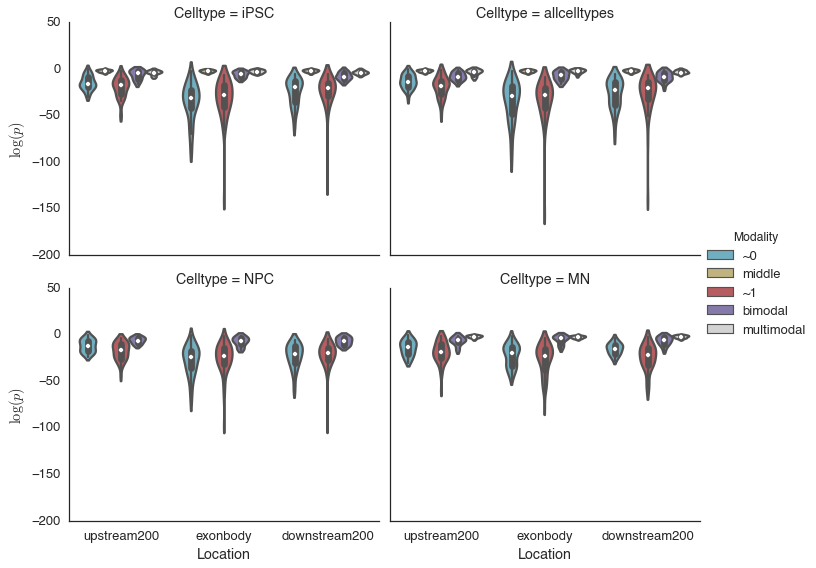

In [137]:
region_order = ['upstream200', 'exonbody', 'downstream200']

g = sns.factorplot(data=motif_metadata, hue='Modality', col='Celltype', col_wrap=2, x='Location', 
               y='$\log(p)$', kind='violin', aspect=1.25, scale='width', hue_order=MODALITY_ORDER, 
               palette=MODALITY_PALETTE, order=region_order, cut=True)
g.savefig('{}/motif_p_values.pdf'.format(folder))

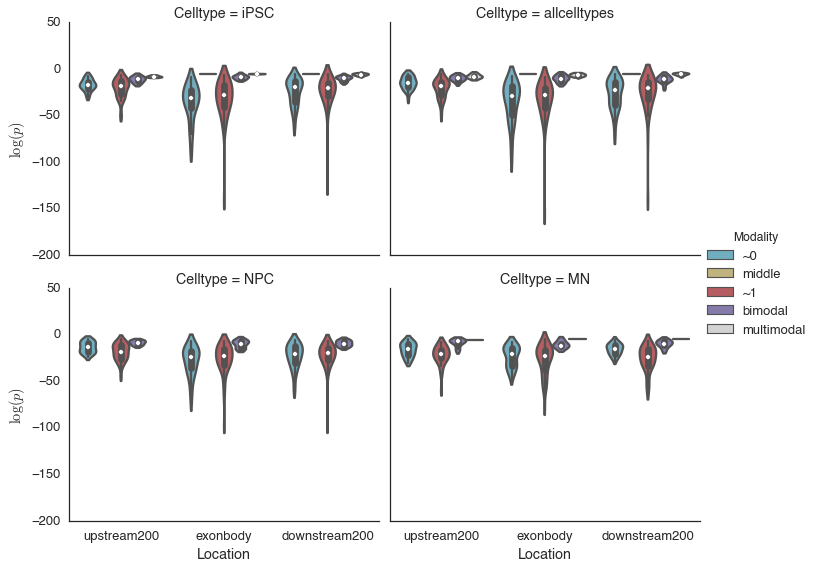

In [136]:
region_order = ['upstream200', 'exonbody', 'downstream200']

motif_metadata_logp_filtered = motif_metadata.loc[motif_metadata['$\log(p)$'] < -5]

g = sns.factorplot(data=motif_metadata_logp_filtered, hue='Modality', col='Celltype', col_wrap=2, x='Location', 
               y='$\log(p)$', kind='violin', aspect=1.25, scale='width', hue_order=MODALITY_ORDER, 
               palette=MODALITY_PALETTE, order=region_order, cut=True)
g.savefig('{}/motif_p_values_filtered.pdf'.format(folder))

In [111]:
motif_scores = pd.concat(score_dfs, axis=1)

In [112]:
motif_scores.shape

(5376, 1416)

In [131]:
study.supplemental.modality_motif_scores = motif_scores

In [132]:
study.save('singlecell_pnm_figure3_modality_motifs')

Wrote datapackage to /home/obotvinnik/flotilla_projects/singlecell_pnm_figure3_modality_motifs/datapackage.json


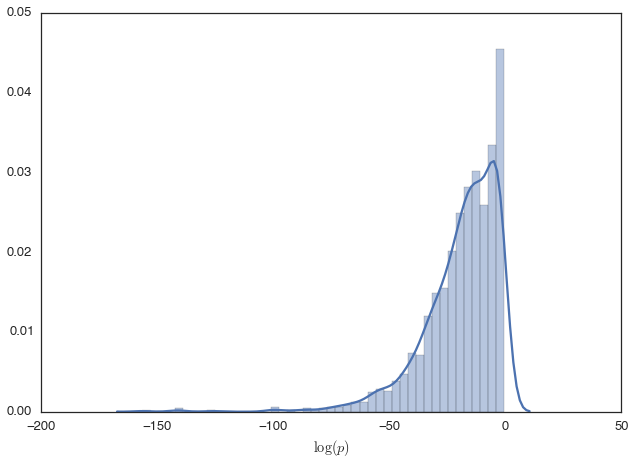

In [133]:
sns.distplot(study.supplemental.modality_motif_metadata['$\log(p)$'])

In [138]:
motif_scores.shape

(5376, 1416)

In [139]:
%time motif_scores_corr = motif_scores.corr(method='spearman')

CPU times: user 14min 46s, sys: 36 ms, total: 14min 46s
Wall time: 14min 47s


In [152]:
motif_metadata = motif_metadata.loc[~motif_metadata.index.duplicated()]

In [142]:
motif_scores_corr.shape

(1416, 1416)

In [144]:
celltype_to_color = dict(study.phenotype_to_color)
celltype_to_color['allcelltypes'] = '#40E0D0' # Turquoise

In [145]:
from modish import MODALITY_TO_COLOR

In [159]:
motif_scores.shape

(5376, 1416)

In [161]:
motif_scores = motif_scores.loc[:,~motif_scores.columns.duplicated()]

In [162]:
ind = ~motif_scores_corr.index.duplicated()
motif_scores_corr = motif_scores_corr.loc[ind, ind]

In [164]:
motif_scores_corr.shape

(1264, 1264)

In [ ]:

for location, df in motif_scores.groupby(motif_metadata['Location'], axis=1):
    corr_subset = motif_scores_corr.loc[df.columns, df.columns]
#     corr = motif_scores.corr(method='spearman')
    print  corr_subset.shape
    
    figwidth = int(corr_subset.shape[0]/4.)
    figsize = (figwidth, figwidth)
    
    side_colors = [[MODALITY_TO_COLOR[x] for x in motif_metadata.loc[df.columns, 'Modality']],
                   [celltype_to_color[x] for x in motif_metadata.loc[df.columns, 'Celltype']]]
    g = sns.clustermap(corr_subset, metric='cityblock', row_colors=side_colors, col_colors=side_colors, figsize=figsize)
    g.ax_col_dendrogram.set(title=location)
    g.savefig('{}/motif_clustermap_{}.png'.format(folder, location), dpi=150)

In [ ]:
print corr_subset.shape

In [ ]:

for location, df1 in motif_scores.groupby(motif_metadata['Location'], axis=1):
    for modality, df2 in df1.groupby(motif_metadata['Modality'], axis=1):
        corr_subset = motif_scores_corr.loc[df2.columns, df2.columns]
    #     corr = motif_scores.corr(method='spearman')

        figwidth = int(corr_subset.shape[0]/4.)
        figsize = (figwidth, figwidth)
        
        side_colors = [[MODALITY_TO_COLOR[x] for x in motif_metadata.loc[df2.columns, 'Modality']],
                       [celltype_to_color[x] for x in motif_metadata.loc[df2.columns, 'Celltype']]]
        g = sns.clustermap(corr_subset, metric='cityblock', row_colors=side_colors, col_colors=side_colors, figsize=figsize)
        g.ax_col_dendrogram.set(title=location)
        g.savefig('{}/motif_clustermap_{}_{}.png'.format(folder, location, modality), dpi=150)

In [ ]:

for location, df1 in motif_scores.groupby(motif_metadata['Location'], axis=1):
    for celltype, df2 in df1.groupby(motif_metadata['Celltype'], axis=1):
        corr_subset = motif_scores_corr.loc[df2.columns, df2.columns]
    #     corr = motif_scores.corr(method='spearman')

        figwidth = int(corr_subset.shape[0]/4.)
        figsize = (figwidth, figwidth)
    
        side_colors = [[MODALITY_TO_COLOR[x] for x in motif_metadata.loc[df2.columns, 'Modality']],
                       [celltype_to_color[x] for x in motif_metadata.loc[df2.columns, 'Celltype']]]
        g = sns.clustermap(corr_subset, metric='cityblock', row_colors=side_colors, col_colors=side_colors, figsize=figsize)
        g.ax_col_dendrogram.set(title=location)
        g.savefig('{}/motif_clustermap_{}_{}.png'.format(folder, location, celltype), dpi=150)

In [ ]:
g = sns.clustermap(corr, metric='cityblock')
# g.ax_col_dendrogram.lines = []

In [ ]:
lines = record.splitlines()
motif_pwm = pd.read_table(six.StringIO('\n'.join(lines[1:])), header=None, names=list("ACGU"))
motif_pwm

In [172]:
import numpy as np

In [173]:
kmers_list[-10:]

[['U', 'U', 'U', 'U', 'C', 'G'],
 ['U', 'U', 'U', 'U', 'C', 'U'],
 ['U', 'U', 'U', 'U', 'G', 'A'],
 ['U', 'U', 'U', 'U', 'G', 'C'],
 ['U', 'U', 'U', 'U', 'G', 'G'],
 ['U', 'U', 'U', 'U', 'G', 'U'],
 ['U', 'U', 'U', 'U', 'U', 'A'],
 ['U', 'U', 'U', 'U', 'U', 'C'],
 ['U', 'U', 'U', 'U', 'U', 'G'],
 ['U', 'U', 'U', 'U', 'U', 'U']]

In [174]:
motif_length

6

In [175]:
motif_pwm.head()

,A,C,G,U
0,0.1,0.7,0.1,0.1
1,0.1,0.1,0.1,0.7
2,0.7,0.1,0.1,0.1
3,0.1,0.1,0.7,0.1


In [176]:
motif_pwm6 = motif_pwm.append(pd.DataFrame([[.1, .5, .3, .1], [.1, .5, .3, .1]], columns=list('ACGU')), ignore_index=True)
motif_pwm6

,A,C,G,U
0,0.1,0.7,0.1,0.1
1,0.1,0.1,0.1,0.7
2,0.7,0.1,0.1,0.1
3,0.1,0.1,0.7,0.1
4,0.1,0.5,0.3,0.1
5,0.1,0.5,0.3,0.1


In [186]:
pwm

,A,C,G,U
0,0.1,0.7,0.1,0.1
1,0.1,0.1,0.1,0.7
2,0.7,0.1,0.1,0.1
3,0.1,0.1,0.7,0.1
4,0.1,0.5,0.3,0.1
5,0.1,0.5,0.3,0.1


In [187]:
kmer4 = u'GCAU'
kmer5 = u'GCAUG'
kmer6 = u'UGCAUG'

In [196]:
kmer_scores = pd.Series(score_kmers(motif_pwm6, kmers_list), index=kmers)
kmer_scores[[kmer4, kmer5, kmer6]]

GCAU      0.150000
GCAUG     0.200000
UGCAUG    0.133333
dtype: float64

In [188]:
# UGCAUG
(0.1*5+0.3)/6

0.13333333333333333

In [189]:
# GCAUG score
((0.1*3 + 0.7 +0.3)/5 + (0.1*4 + 0.3)/5)/2

0.2

In [193]:
# GCAU score
((0.1*3 + 0.7)/4 + 0.1 + 0.1)/3

0.15

In [190]:
pwmm

,A,C,G,U
0,0.1,0.7,0.1,0.1
1,0.1,0.1,0.1,0.7
2,0.7,0.1,0.1,0.1
3,0.1,0.1,0.7,0.1
4,0.1,0.5,0.3,0.1
5,0.1,0.5,0.3,0.1


In [195]:
kmer_scores = pd.Series(score_kmers(motif_pwm, kmers_list), index=kmers)
kmer_scores[[kmer4, kmer5, kmer6]]

GCAU      0.250
GCAUG     0.325
UGCAUG    0.250
dtype: float64

In [197]:
motif_pwm

,A,C,G,U
0,0.1,0.7,0.1,0.1
1,0.1,0.1,0.1,0.7
2,0.7,0.1,0.1,0.1
3,0.1,0.1,0.7,0.1


In [198]:
# GCAU score
(0.1*3 + 0.7)/4

0.25

In [199]:
# GCAUG score
((0.1*3 + 0.7)/4 + (0.7*2 + 0.1*2)/4)/2

0.32499999999999996

In [200]:
# UGCAUG score
(0.1 + (0.1*3 + 0.7)/4 + (0.7*2 + 0.1*2)/4)/3

0.25

In [192]:
mdd

NameError: name 'mdd' is not defined

In [160]:
kmer_scores.index

Index([u'AAAA', u'AAAC', u'AAAG', u'AAAU', u'AACC', u'AACG', u'AACU', u'AAGG',
       u'AAGU', u'AAUU', 
       ...
       u'CGGUUU', u'CGUUUU', u'CUUUUU', u'GGGGGG', u'GGGGGU', u'GGGGUU',
       u'GGGUUU', u'GGUUUU', u'GUUUUU', u'UUUUUU'],
      dtype='object', length=175)

In [156]:
kmer_scores.argmax()

'AAGG'

In [26]:
for motif in all_motifs:
    print motif.consensus

CGGA
GATC
CAGG
GGAG
GGGC
GTTC
GCAA
AGTG
GAGG
GGAG
GGAG
TGAC
CGCT
ACGG
GGTC
GGAG
GAGT
AGGT
GAGC
TGAG
GTCG
GTCG
GGTG


In [21]:
type(m)ma


Bio.motifs.transfac.Record